### Introduction

```
profiling the best companies and job positions to work for from the database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

```

```
Data Dictionary:

‘Unnamed 0’ - Index of the dataset
Email_hash - Anonymised Personal Identifiable Information (PII)
Company_hash - This represents an anonymized identifier for the company, which is the current employer of the learner.
orgyear - Employment start date
CTC - Current CTC
Job_position - Job profile in the company
CTC_updated_year - Year in which CTC got updated (Yearly increments, Promotions)


Concept Used:

Manual Clustering
Unsupervised Clustering - K- means, Hierarchical Clustering

What does “good” look like?

Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
Checking unique emails and frequency of occurrence of the same email hash in the data. Recording observation and inference, wherever necessary.
Checking for missing values and Prepare data for KNN/ Mean Imputation.
You may have to remove special characters from the dataset by using Regex
Don’t worry if you haven’t used that before. The syntax is quite simple and intuitive
Code:
mystring='\tAirtel X Labs'
re.sub('[^A-Za-z0-9 ]+', '', mystring)
Checking for duplicates in the dataset and drop them
Making some new features like adding ‘Years of Experience’ column by subtracting orgyear from current year
Manual Clustering on the basis of learner’s company, job position and years of experience
Getting the 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company, Job Position, Years of Experience
Merging the same with original dataset carefully and creating some flags showing learners with CTC greater than the Average of their Company’s department having same Years of Experience - Call that flag designation with values [1,2,3]
Doing above analysis at Company & Job Position level. Name that flag Class with values [1,2,3]
Repeating the same analysis at the Company level. Name that flag Tier with values [1,2,3]
Based on the manual clustering done so far, answering few questions like:
Top 10 employees (earning more than most of the employees in the company) - Tier 1
Top 10 employees of data science in each company earning more than their peers - Class 1
Bottom 10 employees of data science in each company earning less than their peers - Class 3
Bottom 10 employees (earning less than most of the employees in the company)- Tier 3
Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X
Top 10 companies (based on their CTC)
Top 2 positions in every company (based on their CTC)
Data processing for Unsupervised clustering - Label encoding/ One- hot encoding, Standardization of data
Unsupervised Learning - Clustering
Checking clustering tendency
Elbow method
K-means clustering
Hierarchical clustering (you can do this on a sample of the dataset if your process is taking time)
Insights from Unsupervised Clustering
Provide actionable Insights & Recommendations for the Business.
```

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [265]:
from matplotlib import rcParams
warnings.filterwarnings("ignore")
rcParams['font.family'] = 'DejaVu Sans'

In [266]:
plt.style.use('dark_background')

In [267]:
# df = pd.read_csv(data_url) or 
!wget -nc -P ../data/ 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv'


File ‘../data/scaler_clustering.csv’ already there; not retrieving.



In [268]:
df= pd.read_csv(r"../data/scaler_clustering.csv")

In [269]:
df.head(5)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [271]:
df.describe(include= ['object', 'int64', 'float64'])

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
count,205843.000000,205799,205843,205757.000000,2.058430e+05,153279,205843.000000
unique,NaN,37299,153443,NaN,NaN,1016,NaN
top,NaN,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,NaN,NaN,Backend Engineer,NaN
freq,NaN,8337,10,NaN,NaN,43554,NaN
mean,103273.941786,NaN,NaN,2014.882750,2.271685e+06,NaN,2019.628231
std,59741.306484,NaN,NaN,63.571115,1.180091e+07,NaN,1.325104
min,0.000000,NaN,NaN,0.000000,2.000000e+00,NaN,2015.000000
25%,51518.500000,NaN,NaN,2013.000000,5.300000e+05,NaN,2019.000000
50%,103151.000000,NaN,NaN,2016.000000,9.500000e+05,NaN,2020.000000
75%,154992.500000,NaN,NaN,2018.000000,1.700000e+06,NaN,2021.000000


``` 
1. Backend engineer seems to be the frequent job position
2. There are 205843 rows and 7 columns
3. Let's clean the data set first handling null, duplicates and outliers
```

In [272]:
# defining a functin to clean the strings containing anything other than letters, numbers, and spaces
import re

def clean_string(s):
    if not isinstance(s, str):
        s= str(s)
    return re.sub('[^A-Za-z0-9 ]+', '', s)

In [273]:
df1= df.copy()

In [274]:
df1['company_hash']= df1['company_hash'].apply(clean_string)

In [275]:
df1.duplicated().sum()

np.int64(0)

``` Since data can not be duplicated in terms of email and company, I am gonna drop some rows```

In [276]:
df1.drop_duplicates(subset= ['email_hash', 'company_hash'], keep= 'last', inplace= True)

In [277]:
df1.isna().sum()

Unnamed: 0              0
company_hash            0
email_hash              0
orgyear                80
ctc                     0
job_position        36629
ctc_updated_year        0
dtype: int64

``` 
1.The email and the company data are hashed, therefore I had to drop rows based on uniqueness of each of those 2 features-

2. "hashed" refers to the process of transforming data (like email addresses and company names) into a fixed-size string of characters, which is typically a hexadecimal number.

```

In [278]:
df1.drop(columns= ['Unnamed: 0'], inplace= True)

In [279]:
# since ctc_updated_year is float64, we will convert it to datetime datatype
df1['ctc_updated_year']= pd.to_datetime(df1['ctc_updated_year'], format= '%Y')
df1['ctc_updated_year'] = df1['ctc_updated_year'].dt.year

<Axes: xlabel='orgyear'>

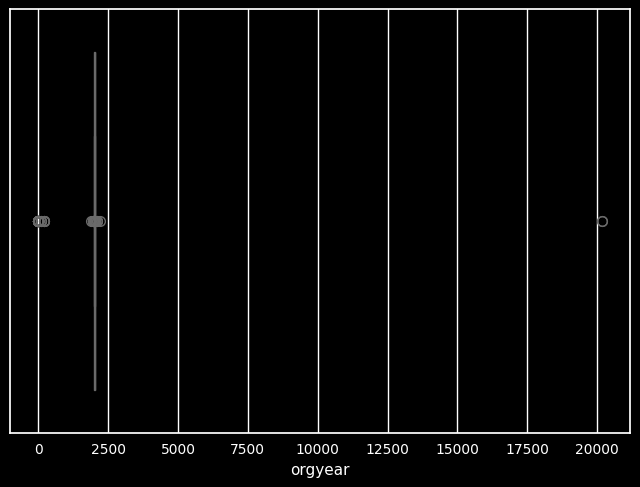

In [280]:
sns.boxplot(df1, x= 'orgyear')

In [281]:
valid_years= range(1900, 2025)
df1['orgyear'] = df1['orgyear'].apply(lambda x: x if x in valid_years else np.nan)

# Changing float datatype to datetime data type
df1['orgyear']= pd.to_datetime(df1['orgyear'], format= '%Y')
df1['orgyear']= df1['orgyear'].dt.year

In [282]:
df1.isna().sum()

company_hash            0
email_hash              0
orgyear               154
ctc                     0
job_position        36629
ctc_updated_year        0
dtype: int64

In [283]:
from sklearn.impute import KNNImputer

In [284]:
df1['job_position'].fillna('other', inplace= True)

knn_imputer = KNNImputer(n_neighbors= 5)
numerical_cols= ['orgyear']

df1[numerical_cols]= knn_imputer.fit_transform(df1[numerical_cols])

In [285]:
df1.isna().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

``` data is clean from here on```

In [286]:
from datetime import datetime

In [287]:
## Engineering new features to get years of xperience
current_year= datetime.now().year
df1['YOE']= current_year - df1['orgyear']

In [288]:
df1.head(5)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020,9.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020,10.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019,8.0
7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,400000,Backend Engineer,2019,6.0
9,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019.0,360000,other,2019,6.0


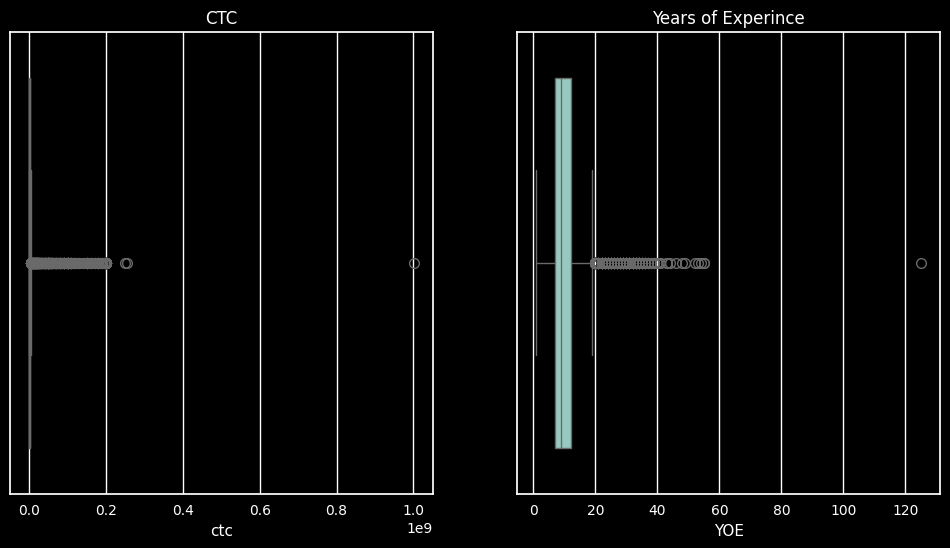

In [289]:
## let's do some boxplots for CTC and YOE- this is helping to check outliers, if any.
fig, ax= plt.subplots(1, 2, figsize= (12,6))
sns.boxplot(data= df1, x= 'ctc', ax= ax[0])
ax[0].set_title('CTC')
ax[0].tick_params(axis='y', colors='white')

sns.boxplot(data= df1, x= 'YOE', ax= ax[1])
ax[1].set_title('Years of Experince')
ax[1].tick_params(axis= 'y', colors= 'white')

plt.show()

``` significant outliers in the data, which can impact clustering algorithm```

In [290]:
## capping the upper bounds for both ctc and YOE
ctc_upper_bound = df1['ctc'].quantile(0.99)
df1['ctc_capped']= np.clip(df1['ctc'], df1['ctc'].min(), ctc_upper_bound)

yoe_upper_bound= df1['YOE'].quantile(0.99)
df1['YOE_capped']= np.clip(df1['YOE'], df1['YOE'].min(), yoe_upper_bound)

In [291]:
df1

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,ctc_capped,YOE_capped
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020,9.0,1100000,9.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020,10.0,2000000,10.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019,8.0,700000,8.0
7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,400000,Backend Engineer,2019,6.0,400000,6.0
9,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019.0,360000,other,2019,6.0,360000,6.0
...,...,...,...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,other,2019,17.0,220000,17.0
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,other,2020,8.0,500000,8.0
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,other,2021,4.0,700000,4.0
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,other,2019,6.0,5100000,6.0


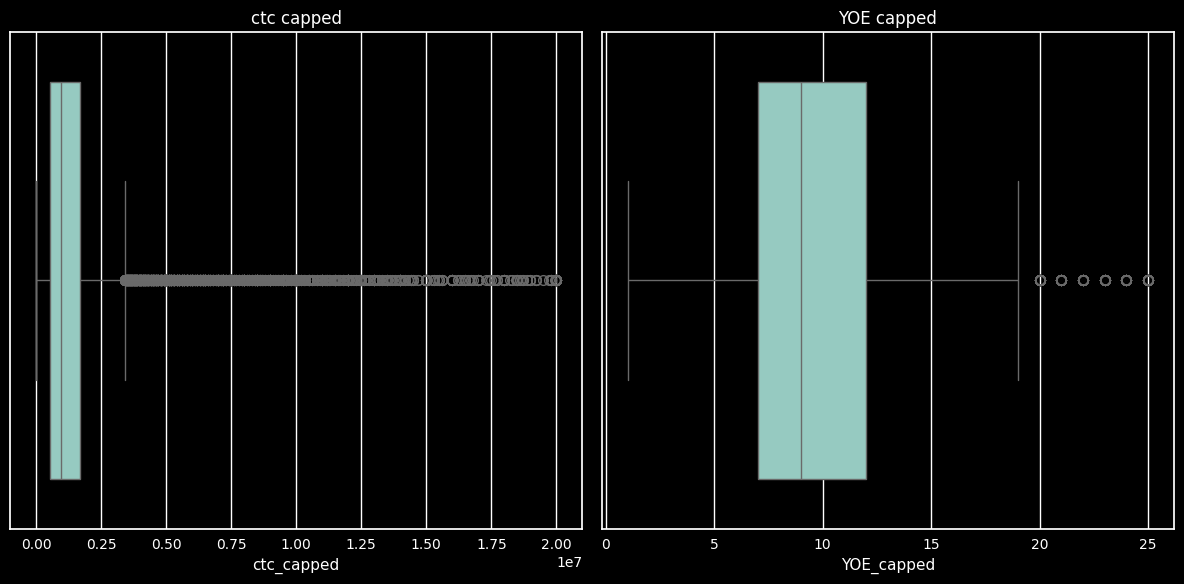

In [292]:
fig, ax= plt.subplots(1, 2, figsize=(12,6))

sns.boxplot(data= df1, x= 'ctc_capped', ax= ax[0])
ax[0].set_title("ctc capped")

sns.boxplot(data= df1, x= 'YOE_capped', ax= ax[1])
ax[1].set_title("YOE capped")

plt.tight_layout()
plt.show()

In [293]:
# lets drop the old  ctc and yoe columns
df1.drop(['ctc', 'YOE'], inplace= True, axis = 1)

In [294]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160312 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      160312 non-null  object 
 1   email_hash        160312 non-null  object 
 2   orgyear           160312 non-null  float64
 3   job_position      160312 non-null  object 
 4   ctc_updated_year  160312 non-null  int32  
 5   ctc_capped        160312 non-null  int64  
 6   YOE_capped        160312 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 9.2+ MB


```
Creating Flags to engineer some feature:

Designation Flag: CTC on the basis of Company, Job Position and Years of Experience
Class Flag: CTC On the basis of Company and Job Position
Tier Flag: CTC On the basis of Company

```

In [295]:
group_summary_designation= df1.groupby(['company_hash', 'job_position', 'YOE_capped'])['ctc_capped'].agg(['mean']).reset_index()
group_summary_designation.rename(columns= {'mean': 'mean_designation'}, inplace= True)

group_summary_class= df1.groupby(['company_hash', 'job_position'])['ctc_capped'].agg(['mean']).reset_index()
group_summary_class.rename(columns= {'mean':'mean_class'}, inplace= True)

group_summary_tier= df1.groupby(['company_hash'])['ctc_capped'].agg(['mean']).reset_index()
group_summary_tier.rename(columns= {'mean':'mean_tier'}, inplace= True)


In [296]:
df2= df1.merge(group_summary_designation, on= ['company_hash', 'job_position', 'YOE_capped'])
df2= df2.merge(group_summary_class, on= ['company_hash', 'job_position'])
df2= df2.merge(group_summary_tier, on= ['company_hash'])

In [297]:
df2.head()

,company_hash,email_hash,orgyear,job_position,ctc_updated_year,ctc_capped,YOE_capped,mean_designation,mean_class,mean_tier
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,Other,2020,1100000,9.0,1100000.0,1.085000e+06,1.115667e+06
1,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,Backend Engineer,2020,2000000,10.0,2000000.0,2.000000e+06,2.000000e+06
2,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,Backend Engineer,2019,700000,8.0,1060000.0,1.515000e+06,1.674091e+06
3,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,Backend Engineer,2019,400000,6.0,425000.0,1.243333e+06,8.115000e+05
4,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019.0,other,2019,360000,6.0,360000.0,3.600000e+05,3.600000e+05


In [298]:
def designation_flag(row):
    if row['ctc_capped'] > row['mean_designation']:
        return 3
    elif row['ctc_capped'] == row['mean_designation']:
        return 2
    elif row['ctc_capped'] < row['mean_designation']:
        return 1

def class_flag(row):
    if row['ctc_capped'] > row['mean_class']:
        return 3
    elif row['ctc_capped'] == row['mean_class']:
        return 2
    elif row['ctc_capped'] < row['mean_class']:
        return 1    

def tier_flag(row):
    if row['ctc_capped'] > row['mean_tier']:
        return 3
    elif row['ctc_capped'] == row['mean_tier']:
        return 2
    elif row['ctc_capped'] < row['mean_tier']:
        return 1


In [299]:
df2['designation_flag']= df2.apply(designation_flag, axis= 1)
df2['class_flag']= df2.apply(class_flag, axis = 1)
df2['tier_flag']= df2.apply(tier_flag, axis = 1)

In [300]:
df2.head(3)

,company_hash,email_hash,orgyear,job_position,ctc_updated_year,ctc_capped,YOE_capped,mean_designation,mean_class,mean_tier,designation_flag,class_flag,tier_flag
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,Other,2020,1100000,9.0,1100000.0,1085000.0,1.115667e+06,2,3,1
1,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,Backend Engineer,2020,2000000,10.0,2000000.0,2000000.0,2.000000e+06,2,2,2
2,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,Backend Engineer,2019,700000,8.0,1060000.0,1515000.0,1.674091e+06,1,1,1


In [301]:
df2.drop(['mean_designation', 'mean_class', 'mean_tier'], axis= 1, inplace= True)

In [302]:
##Top 10 Employees with Designation Flag 1 (Earning More Than Most of Their Peers with Same Job Position and Experience)

top_10_designation1= df2[df2['designation_flag']==1].sort_values(by= 'ctc_capped', ascending= False).head(10)

top_10_designation1 

,company_hash,email_hash,orgyear,job_position,ctc_updated_year,ctc_capped,YOE_capped,designation_flag,class_flag,tier_flag
148015,vbvkgz ftm otqcxwto,0932dc8d855953b2ac63c8046c9fb33f7f554174b6c2fe...,2013.0,Backend Engineer,2019,11200000,12.0,1,3,3
131677,sqvm,ed3b3231ac4758173e68bcde8eac3842497e153d9d1832...,2015.0,Engineering Leadership,2019,9200000,10.0,1,3,3
148563,hmtq,9885423385b89dd905f1df74a1d6e71906ccccd915c7e4...,2013.0,Engineering Leadership,2020,8500000,12.0,1,3,3
76860,xzntr wgqugqvnxgz,9aa54ea5c7e0b2567cc43718bd6516f3cfefb5622b6e2b...,2015.0,Other,2021,8400000,10.0,1,3,3
56203,fvrbvqn rvmo,9adf861294aa69336409395a5474ce6f9ffbfd38594ed4...,2010.0,Backend Architect,2019,8100000,15.0,1,3,3
156086,vba,f9530fc2d3629fc9a04c7e4e2ea6b8ddbe03eb3a97caff...,2003.0,Engineering Leadership,2020,8100000,22.0,1,1,3
3193,eqttwyvqst,28dc7d414a336ebfecf691f1db3b9cdc95b58ffede1107...,2005.0,Engineering Leadership,2020,7300000,20.0,1,3,3
122147,sggsrt,97f2289a59953b4e94f8d2436f6edf621b9a359d919bbc...,2019.0,FullStack Engineer,2020,7300000,6.0,1,3,3
44474,gnytq,4f4f4bac863dc79205345fd614a4e4cd4c99718533c60d...,2017.0,Data Analyst,2019,7300000,8.0,1,3,3
127554,vbvkgz,16ccf03850703672fe9e1ddd44571f98931d9788cd703d...,2004.0,Engineering Leadership,2017,7000000,21.0,1,3,3


In [303]:
# Bottom 10 Employees with Designation Flag 3 (Earning Less Than Most of Their Peers with Same Job Position and Experience)
bottom_10_designation3= df2[df2['designation_flag']== 3].sort_values(by= 'ctc_capped', ascending= True).head(10)
bottom_10_designation3

,company_hash,email_hash,orgyear,job_position,ctc_updated_year,ctc_capped,YOE_capped,designation_flag,class_flag,tier_flag
79474,xzntqcxtfmxn,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,2013.0,other,2018,14,12.0,3,1,1
47427,xz rgwg,66573ebeb4fcfc496d2af1548a18a62ec3a48dae59d1cc...,2016.0,Backend Engineer,2016,16000,9.0,3,3,3
64227,xmtd,792ac1d3daa5bc5fef39e3d61e0722cce004a0b81966b1...,2016.0,FullStack Engineer,2021,27000,9.0,3,3,3
52273,wgbgag,87f95061ed13da965818fded3d19249bc6d88de3b73ff2...,2014.0,Backend Engineer,2017,36000,11.0,3,3,1
100591,kvrgqv sqghu,0b1eeb6d24629a06d29fcd410c02d0f1f2577a0a050c54...,2017.0,Backend Engineer,2020,40000,8.0,3,3,3
70535,ogwxn szqvrt,38e8416bc59782b9fb60b144657130662ec8dab8094a41...,2018.0,Data Scientist,2021,55000,7.0,3,1,1
131283,cxkqn,718ad268d9c671de079ff1c55f93e91a2d06928243ad29...,2011.0,Backend Engineer,2020,55000,14.0,3,3,3
119630,zvnxgzvr wgrrtst ge xqtrvza,fb10b6e7b4fcc82e96f5a591146046c0988c23cccb8269...,2019.0,Other,2019,60000,6.0,3,3,3
153359,wtqz,217504679c19c4738eb44eacb651c80432d3a3801f62a5...,2014.0,FullStack Engineer,2019,65000,11.0,3,3,1
61670,jvzatd,2f31b0f7d87048f22a9a6eb33526325d0b3f470185652b...,2019.0,Backend Engineer,2020,70000,6.0,3,1,1


In [304]:
len(df2['company_hash'].unique()), len(df2['company_hash'])

(37300, 160312)

In [305]:
df2.head(3)

,company_hash,email_hash,orgyear,job_position,ctc_updated_year,ctc_capped,YOE_capped,designation_flag,class_flag,tier_flag
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,Other,2020,1100000,9.0,2,3,1
1,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,Backend Engineer,2020,2000000,10.0,2,2,2
2,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,Backend Engineer,2019,700000,8.0,1,1,1


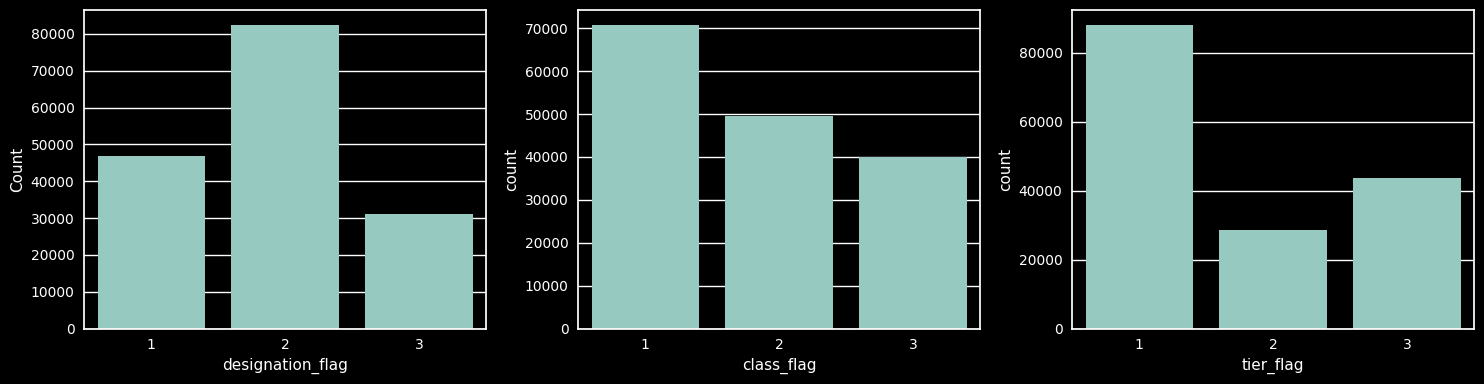

In [306]:
fig, ax= plt.subplots(1, 3, figsize= (15,4))


sns.countplot(data= df2, x= 'designation_flag', ax= ax[0])
ax[0].set_ylabel('Count')

sns.countplot(data= df2, x= 'class_flag', ax= ax[1])
ax[1].set_ylabel('count')


sns.countplot(data= df2, x= 'tier_flag', ax= ax[2])
ax[2].set_ylabel('count')


plt.tight_layout()
plt.show()

In [307]:
# checking the distibutin of the learners based on Tier 3 flag to check which companies are dominating

tier_3_company_counts= df2[df2['tier_flag']== 3]['company_hash'].value_counts()
tier_3_company_counts.head(10)

company_hash
vbvkgz                       966
xzegojo                      806
nvnv wgzohrnvzwj otqcxwto    795
gqvwrt                       646
bxwqgogen                    623
zvz                          485
zgn vuurxwvmrt vwwghzn       442
wgszxkvzn                    433
vagmt                        380
wvustbxzx                    360
Name: count, dtype: int64

``` 
Jumping on to
1. Univariate
2. Bi-Variate
```

In [308]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160312 entries, 0 to 160311
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      160312 non-null  object 
 1   email_hash        160312 non-null  object 
 2   orgyear           160312 non-null  float64
 3   job_position      160312 non-null  object 
 4   ctc_updated_year  160312 non-null  int32  
 5   ctc_capped        160312 non-null  int64  
 6   YOE_capped        160312 non-null  float64
 7   designation_flag  160312 non-null  int64  
 8   class_flag        160312 non-null  int64  
 9   tier_flag         160312 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(3)
memory usage: 11.6+ MB


In [309]:
obj_cols= ['company_hash', 'job_position', 'orgyear']
num_cols= ['ctc_capped', 'YOE_capped']

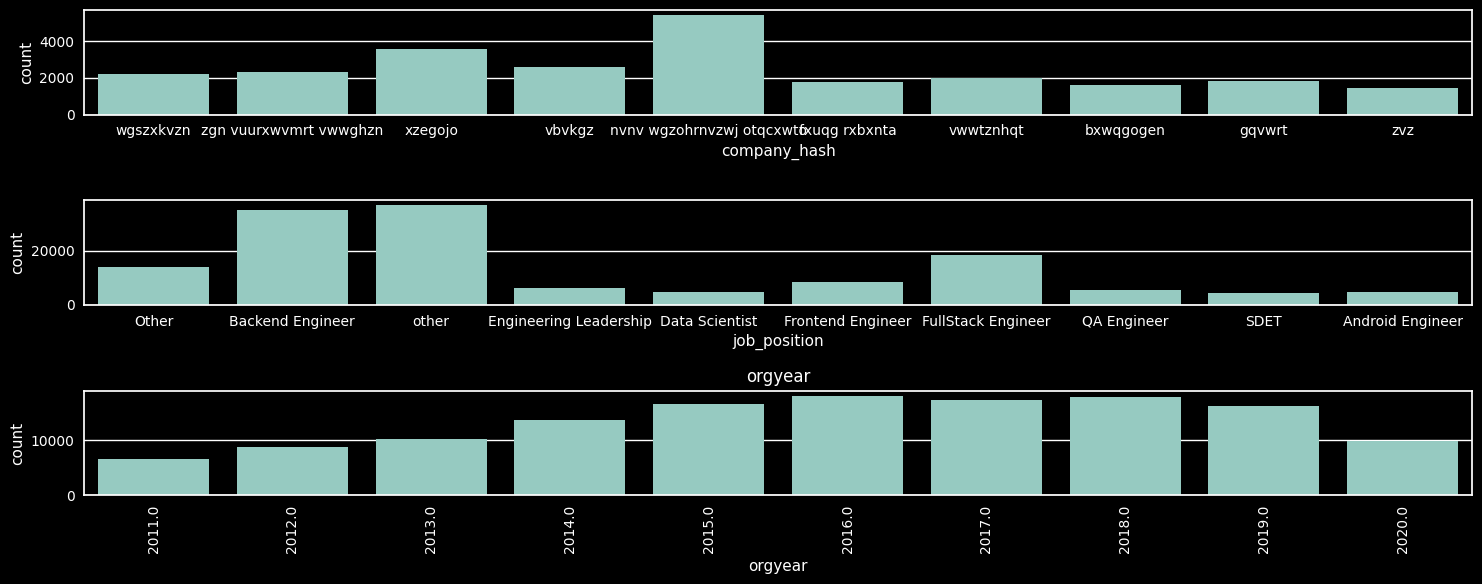

In [310]:
# doing count plots for object columns
fig, ax= plt.subplots(len(obj_cols), 1, figsize= (15,6))

for i, col in enumerate(obj_cols):
    top10= df2[col].value_counts().nlargest(10)
    filtered_data= df2[df2[col].isin(top10.index)]
    sns.countplot(data= filtered_data, x= col, ax= ax[i])
    plt.title(col)
    plt.xticks(rotation= 90)

plt.tight_layout()
plt.show()

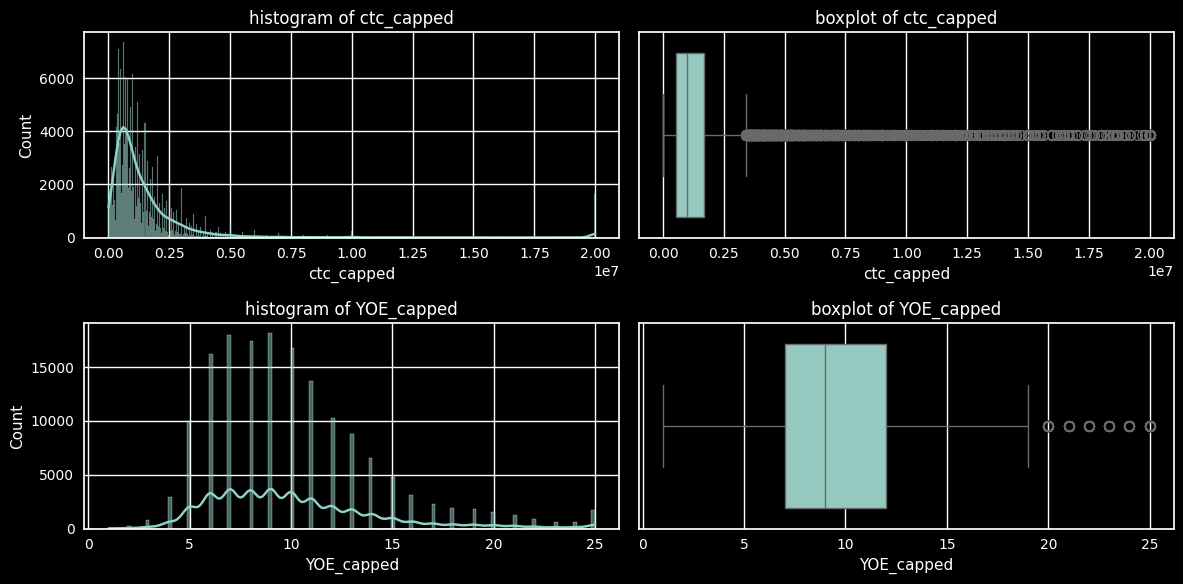

In [311]:
fig, ax= plt.subplots(len(num_cols), 2, figsize= (12, 6))

for i, col in enumerate(num_cols):
    sns.histplot(data= df2, x= col, kde= True, ax= ax[i][0])
    ax[i][0].set_title(f"histogram of {col}")
    
    sns.boxplot(data= df2, x= col, ax= ax[i][1])
    ax[i][1].set_title(f"boxplot of {col}")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'CTC tred with Years of Experience')

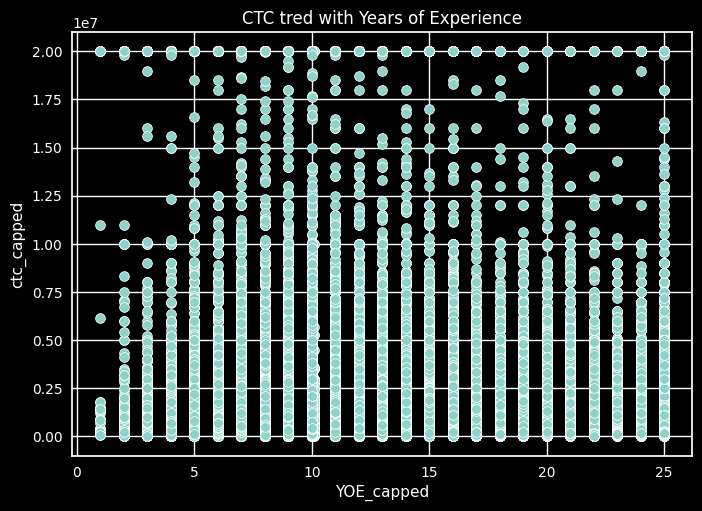

In [312]:
## ctc vs YOE

sns.scatterplot(data= df2, x= 'YOE_capped', y= 'ctc_capped')
plt.title("CTC tred with Years of Experience")

Text(0, 0.5, 'avg ctc')

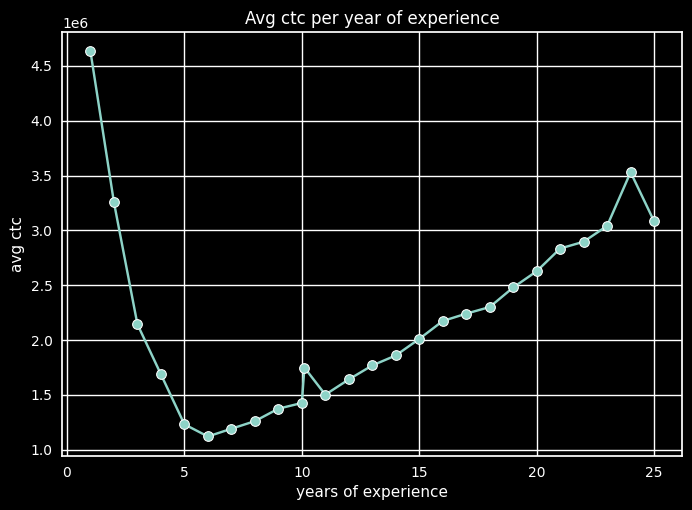

In [313]:
avg_ctc_per_yoe= df2.groupby(['YOE_capped'])['ctc_capped'].agg(['mean']).reset_index()

sns.lineplot(data= avg_ctc_per_yoe, x= 'YOE_capped', y= 'mean', marker= 'o')
plt.title("Avg ctc per year of experience")
plt.xlabel('years of experience')
plt.ylabel("avg ctc")

In [314]:
df2.groupby(['job_position'])['ctc_capped'].agg(['mean']).reset_index().sort_values(by= 'mean', ascending= False)

,job_position,mean
614,Teaching,20000000.0
648,Telar,20000000.0
462,Senior System Engineer,20000000.0
106,Business Man,20000000.0
369,Reseller,20000000.0
...,...,...
240,Junior consultant,10000.0
698,project engineer,7900.0
206,Full-stack web developer,7500.0
638,Technical consultant,2000.0


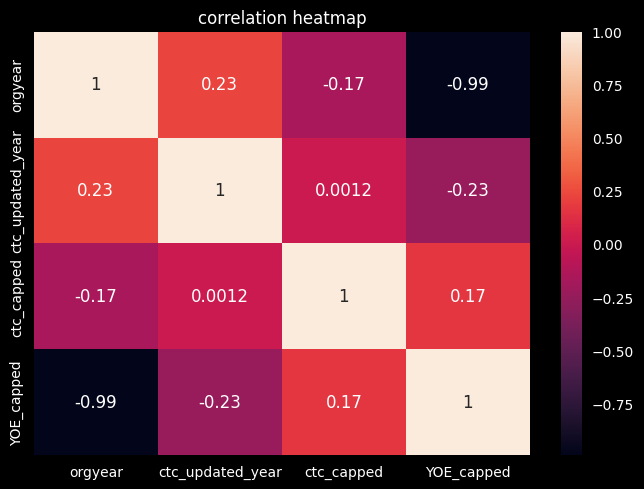

In [315]:
# heat map

sns.heatmap(df2[['orgyear','ctc_updated_year','ctc_capped','YOE_capped']].corr(), annot= True )
plt.title("correlation heatmap")
plt.show()

```
orgyear and ctc_updated_year shown weak positive correlation
Years of Experience and orgyear show strong negative correlation
Years of Experience and CTC show weak positive correaltion
```

#### Data Processing for Unsupervised Learning

In [316]:
df3= df2.drop(['designation_flag', 'class_flag', 'tier_flag'], axis= 1)
df3.head(3)

,company_hash,email_hash,orgyear,job_position,ctc_updated_year,ctc_capped,YOE_capped
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,Other,2020,1100000,9.0
1,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,Backend Engineer,2020,2000000,10.0
2,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,Backend Engineer,2019,700000,8.0


In [317]:
email_hash_freq= df['email_hash'].value_counts().reset_index()
email_hash_freq.columns= ['email_hash', 'non_of_ctc_update']

email_hash_freq.head(3)

,email_hash,non_of_ctc_update
0,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,10
1,3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...,9
2,298528ce3160cc761e4dc37a07337ee2e0589df251d736...,9


In [318]:
# lets merge this with df3
df4= df3.merge(email_hash_freq, on= 'email_hash', how= 'left')
df4.head(3)

,company_hash,email_hash,orgyear,job_position,ctc_updated_year,ctc_capped,YOE_capped,non_of_ctc_update
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,Other,2020,1100000,9.0,2
1,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,Backend Engineer,2020,2000000,10.0,2
2,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,Backend Engineer,2019,700000,8.0,1


In [319]:
df4.drop(['email_hash', 'orgyear', 'ctc_updated_year'], axis= 1, inplace= True)

In [320]:
df4.head(3)

,company_hash,job_position,ctc_capped,YOE_capped,non_of_ctc_update
0,atrgxnnt xzaxv,Other,1100000,9.0,2
1,ojzwnvwnxw vx,Backend Engineer,2000000,10.0,2
2,ngpgutaxv,Backend Engineer,700000,8.0,1


```
encoding categorical columns using frequency encoding

```

In [321]:
df5= df4.copy()
df4.head(3)

,company_hash,job_position,ctc_capped,YOE_capped,non_of_ctc_update
0,atrgxnnt xzaxv,Other,1100000,9.0,2
1,ojzwnvwnxw vx,Backend Engineer,2000000,10.0,2
2,ngpgutaxv,Backend Engineer,700000,8.0,1


In [322]:
df4['company_hash_encoded']= df4['company_hash'].map(df4['company_hash'].value_counts().to_dict())
df4['job_position_encoded']= df4['job_position'].map(df4['job_position'].value_counts().to_dict())
df4.drop(['company_hash', 'job_position'], axis=1, inplace= True)

In [323]:
df4.head(3)

,ctc_capped,YOE_capped,non_of_ctc_update,company_hash_encoded,job_position_encoded
0,1100000,9.0,2,9,14070
1,2000000,10.0,2,1,34974
2,700000,8.0,1,55,34974


```
Log Transformation

Applying Log Transformation on ctc_capped column since it is right skewed. Since skewness can affect performance of clustering algorithms

```

<Axes: xlabel='ctc_capped', ylabel='Count'>

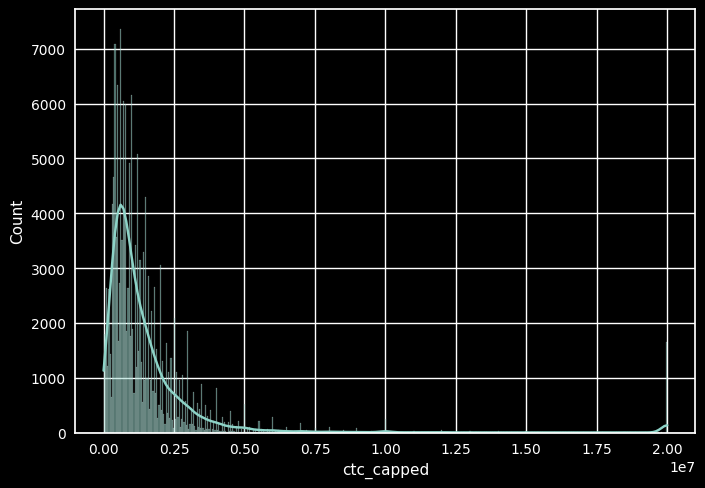

In [324]:
sns.histplot(df4, x= 'ctc_capped', kde= True)

<Axes: xlabel='ctc_capped_log', ylabel='Count'>

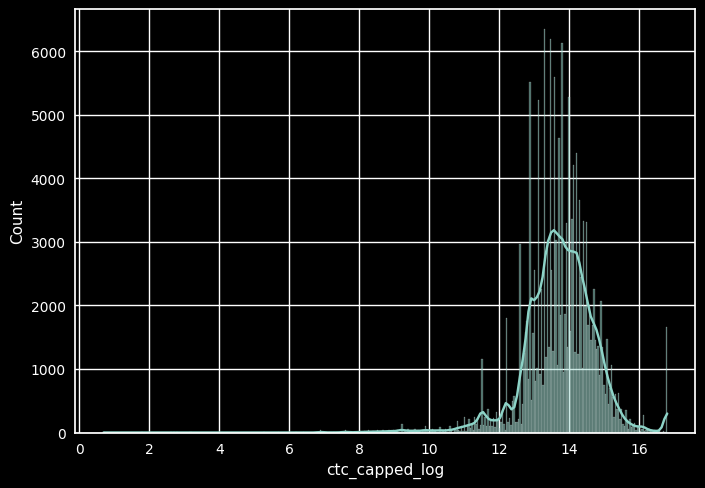

In [325]:
df4['ctc_capped_log']= np.log(df4['ctc_capped'])
sns.histplot(df4, x= 'ctc_capped_log', kde= True)

In [326]:
df4 =df4.drop(['ctc_capped'], axis=1)


In [327]:
df4.head(4)

,YOE_capped,non_of_ctc_update,company_hash_encoded,job_position_encoded,ctc_capped_log
0,9.0,2,9,14070,13.910821
1,10.0,2,1,34974,14.508658
2,8.0,1,55,34974,13.458836
3,6.0,1,20,34974,12.899220


In [328]:
## standar scaling needed for clustering

from sklearn.preprocessing import StandardScaler

In [329]:
scaled_features= StandardScaler().fit_transform(df4)
df4_scaled= pd.DataFrame(scaled_features, columns= df4.columns)

In [330]:
df4_scaled.head(4)

,YOE_capped,non_of_ctc_update,company_hash_encoded,job_position_encoded,ctc_capped_log
0,-0.257074,0.883914,-0.494140,-0.482482,0.162420
1,-0.018126,0.883914,-0.500790,0.991113,0.744097
2,-0.496022,-0.567772,-0.455906,0.991113,-0.277347
3,-0.973919,-0.567772,-0.484997,0.991113,-0.821835


In [331]:
## Furthering into model building now
### K-means Clustering

from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

In [332]:
from yellowbrick.cluster import KElbowVisualizer

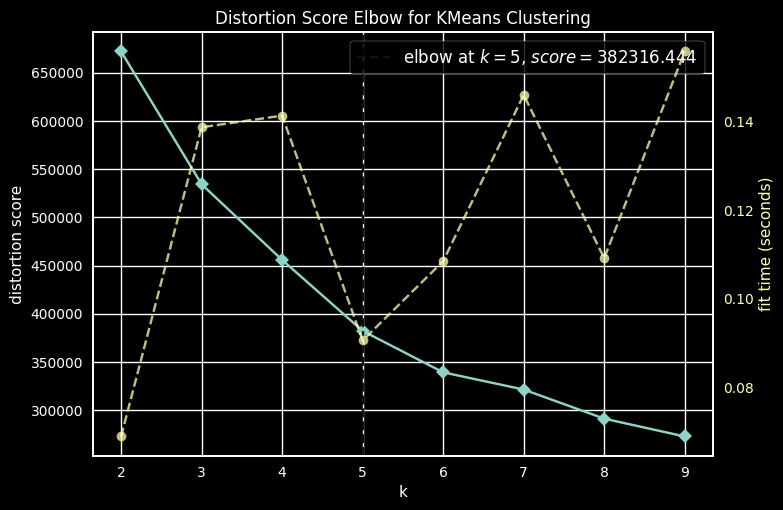

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [333]:
model= KMeans()

visualizer = KElbowVisualizer(model, k= (2,10))
visualizer.fit(df4_scaled)
visualizer.show()

```The elbow point suggests that 5 clusters is a good choice for our data. This is where the inertia starts to decrease at a slower rate, indicating that additional clusters beyond this point don't significantly improve the clustering quality ```

In [334]:
optimal_clusters= 5

k_means= KMeans(n_clusters= optimal_clusters, random_state= 42)
k_means.fit(df4_scaled)


KMeans(n_clusters=5, random_state=42)

In [335]:
df5['kmeans_cluster']= k_means.labels_

In [336]:
df5.head(5)

,company_hash,job_position,ctc_capped,YOE_capped,non_of_ctc_update,kmeans_cluster
0,atrgxnnt xzaxv,Other,1100000,9.0,2,2
1,ojzwnvwnxw vx,Backend Engineer,2000000,10.0,2,2
2,ngpgutaxv,Backend Engineer,700000,8.0,1,1
3,vwwtznhqt ntwyzgrgsj,Backend Engineer,400000,6.0,1,1
4,xrbhd,other,360000,6.0,1,1


In [337]:
## Hierarchical Clustering

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


In [338]:
df4_scaled.shape

(160312, 5)

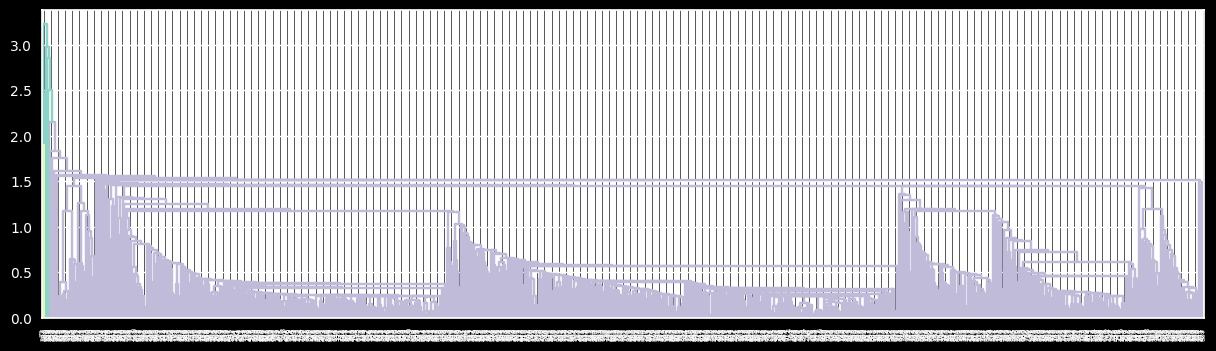

In [339]:
df4_scaled_sampled= df4_scaled.sample(n= 1000, random_state= 42)
Z= linkage(df4_scaled_sampled)

plt.figure(figsize= (15,4))
dendrogram(Z)
plt.show()

``` Both Elbow Method and Dendogram are suggesting 5 clusters for the given dataset```


```
Within-Cluster Sum of Squares (WCSS)

The Within-Cluster Sum of Squares (WCSS) is a measure of the compactness of the clusters formed by the K-means algorithm. It represents the sum of squared distances between each data point and its corresponding cluster centroid. A lower WCSS value indicates tighter clusters, meaning that the data points within each cluster are closer to their respective centroid.

Between-Cluster Sum of Squares (BCSS)

This value represents the total squared distance between each cluster centroid and the overall mean of the data, weighted by the number of points in each cluster. A higher BCSS indicates that the cluster centroids are far from the overall mean, suggesting well-separated clusters.

```

In [340]:
wcss= k_means.inertia_
print(f"within cluster  sum of squares: {wcss}")

within cluster  sum of squares: 382315.12188543036


```WCSS Value Consistency: The WCSS value remains consistent at 362126.90999960434 for 𝑘=5. This value represents the total within-cluster variance for the five clusters formed by K-means```


#### PCA for visualization

In [341]:
from sklearn.decomposition import PCA

In [342]:
pca= PCA(n_components= 2)
pca_features= pca.fit_transform(df4_scaled)

In [343]:
pca_features

array([[-0.04101404,  0.30952539],
       [-0.28640862,  1.48628991],
       [-0.40796567, -0.01025489],
       ...,
       [-1.05323094, -0.11438015],
       [-0.3358982 ,  1.21900983],
       [ 0.06016499,  0.51798815]])

In [344]:
df4_scaled['pca_one']= pca_features[:,0]
df4_scaled['pca_two']= pca_features[:,1]

Text(0.5, 1.0, 'K-means with just PCA(no T-SNE)')

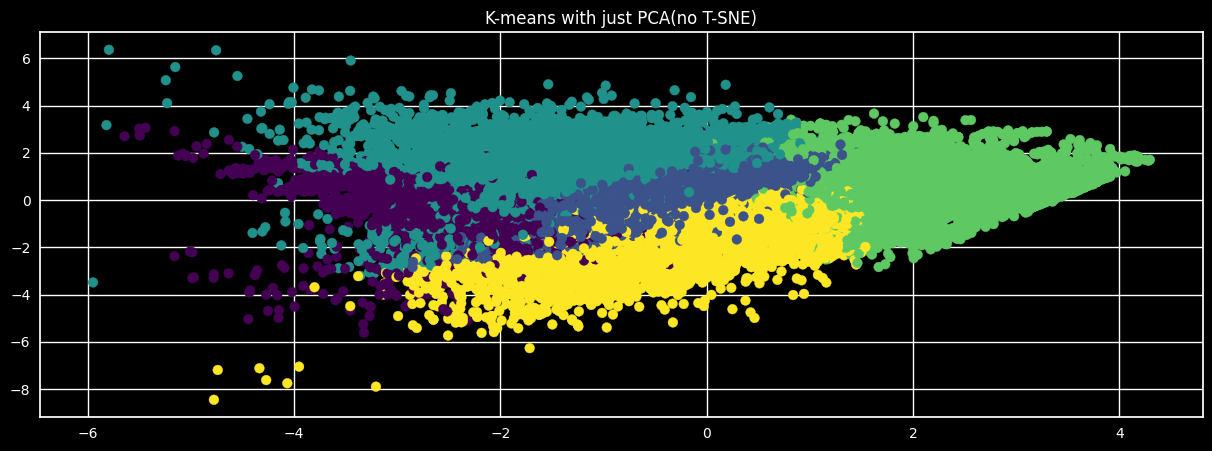

In [345]:
plt.figure(figsize= (15,5))
plt.scatter(df4_scaled['pca_one'], df4_scaled['pca_two'], c= k_means.labels_, cmap= 'viridis')
plt.title('K-means with just PCA(no T-SNE)')

In [346]:
df5.head(2)

,company_hash,job_position,ctc_capped,YOE_capped,non_of_ctc_update,kmeans_cluster
0,atrgxnnt xzaxv,Other,1100000,9.0,2,2
1,ojzwnvwnxw vx,Backend Engineer,2000000,10.0,2,2


In [347]:
cluster_sizes= df5['kmeans_cluster'].value_counts().sort_index(ascending=True)
print(f"Cluster sizes: {cluster_sizes}")

Cluster sizes: kmeans_cluster
0     9719
1    40188
2    34375
3    24359
4    51671
Name: count, dtype: int64


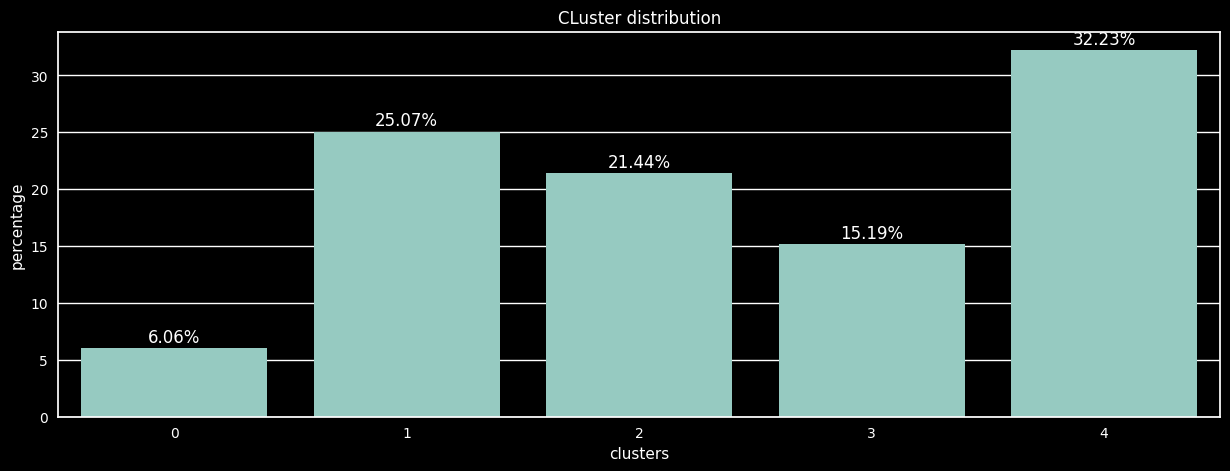

In [348]:
percentage= (cluster_sizes/cluster_sizes.sum())*100
plt.figure(figsize= (15,5))
sns.barplot(x= percentage.index, y= percentage.values)

for i, perc in enumerate(percentage):
    plt.text(i, perc+0.5, f"{perc:.2f}%", ha= 'center')

plt.xlabel("clusters")
plt.ylabel("percentage")
plt.title("CLuster distribution")
plt.show()

In [351]:
from collections import Counter

In [353]:
df5

,company_hash,job_position,ctc_capped,YOE_capped,non_of_ctc_update,kmeans_cluster
0,atrgxnnt xzaxv,Other,1100000,9.0,2,2
1,ojzwnvwnxw vx,Backend Engineer,2000000,10.0,2,2
2,ngpgutaxv,Backend Engineer,700000,8.0,1,1
3,vwwtznhqt ntwyzgrgsj,Backend Engineer,400000,6.0,1,1
4,xrbhd,other,360000,6.0,1,1
...,...,...,...,...,...,...
160307,vuurt xzw,other,220000,17.0,2,2
160308,husqvawgb,other,500000,8.0,1,1
160309,vwwgrxnt,other,700000,4.0,1,1
160310,zgn vuurxwvmrt,other,5100000,6.0,1,1


In [354]:
numeric_columns = ['ctc_capped', 'YOE_capped', 'non_of_ctc_update']

cluster_averages = df5.groupby('kmeans_cluster')[numeric_columns].mean()

In [360]:
def get_common_entries(df:pd.DataFrame, cluster_label:int, column_name:str, top:int= 5):
    cluster_data= df[df['kmeans_cluster']== cluster_label]
    most_common= Counter(cluster_data[column_name]).most_common(top)
    return most_common


cluster_profiles = {}

for cluster in range(5):
    job_positions = get_common_entries(df5, cluster, 'job_position')
    companies = get_common_entries(df5, cluster, 'company_hash')

    cluster_profiles[cluster] = {
        'mean ctc': cluster_averages.loc[cluster, 'ctc_capped'],
        'mean years of experience': cluster_averages.loc[cluster, 'YOE_capped'],
        'On averaged ctc updated': cluster_averages.loc[cluster, 'non_of_ctc_update'],
        'common job positions': job_positions,
        'common companies': companies
    }


In [363]:
# Display the profiles
for cluster, profile in cluster_profiles.items():
    print(f"Cluster {cluster}:")
    print(f"  Average Compensation (CTC): {profile['mean ctc']}")
    print(f"  Average Years of Experience: {profile['mean years of experience']} years")
    print(f"  Average Number of CTC Updates: {profile['On averaged ctc updated']}")
    print("  Common Job Positions:")
    for job, count in profile['common job positions']:
        print(f"    - {job}: {count} occurrences")
    print("  Common Companies:")
    for company, count in profile['common companies']:
        print(f"    - {company}: {count} occurrences")
    print()

Cluster 0:
  Average Compensation (CTC): 768342.87262064
  Average Years of Experience: 7.976597073760378 years
  Average Number of CTC Updates: 1.5684741228521453
  Common Job Positions:
    - other: 3150 occurrences
    - Backend Engineer: 1591 occurrences
    - Other: 1555 occurrences
    - FullStack Engineer: 1247 occurrences
    - Support Engineer: 551 occurrences
  Common Companies:
    - nvnv wgzohrnvzwj otqcxwto: 5436 occurrences
    - xzegojo: 3494 occurrences
    - vbvkgz: 527 occurrences
    - zgn vuurxwvmrt vwwghzn: 193 occurrences
    - wgszxkvzn: 52 occurrences

Cluster 1:
  Average Compensation (CTC): 1663548.9577236986
  Average Years of Experience: 9.203026658271105 years
  Average Number of CTC Updates: 1.0
  Common Job Positions:
    - Backend Engineer: 22273 occurrences
    - other: 16753 occurrences
    - FullStack Engineer: 1065 occurrences
    - Other: 97 occurrences
  Common Companies:
    - vbvkgz: 1006 occurrences
    - zgn vuurxwvmrt: 795 occurrences
    - zv

## Insights

```
Cluster 0:
  Average Compensation (CTC): 768342.87262064
  Average Years of Experience: 7.976597073760378 years
  Average Number of CTC Updates: 1.5684741228521453
  Common Job Positions:
    - other: 3150 occurrences
    - Backend Engineer: 1591 occurrences
    - Other: 1555 occurrences
    - FullStack Engineer: 1247 occurrences
    - Support Engineer: 551 occurrences
  Common Companies:
    - nvnv wgzohrnvzwj otqcxwto: 5436 occurrences
    - xzegojo: 3494 occurrences
    - vbvkgz: 527 occurrences
    - zgn vuurxwvmrt vwwghzn: 193 occurrences
    - wgszxkvzn: 52 occurrences

Cluster 1:
  Average Compensation (CTC): 1663548.9577236986
  Average Years of Experience: 9.203026658271105 years
  Average Number of CTC Updates: 1.0
  Common Job Positions:
    - Backend Engineer: 22273 occurrences
    - other: 16753 occurrences
    - FullStack Engineer: 1065 occurrences
    - Other: 97 occurrences
  Common Companies:
    - vbvkgz: 1006 occurrences
    - zgn vuurxwvmrt: 795 occurrences
    - zvz: 682 occurrences
    - bxwqgogen: 651 occurrences
    - gqvwrt: 621 occurrences

Cluster 2:
  Average Compensation (CTC): 1338905.1801309092
  Average Years of Experience: 8.501798187744148 years
  Average Number of CTC Updates: 2.385861818181818
  Common Job Positions:
    - other: 15054 occurrences
    - Backend Engineer: 9158 occurrences
    - FullStack Engineer: 5748 occurrences
    - Other: 2073 occurrences
    - Frontend Engineer: 466 occurrences
  Common Companies:
    - zgn vuurxwvmrt vwwghzn: 759 occurrences
    - wgszxkvzn: 658 occurrences
    - fxuqg rxbxnta: 620 occurrences
    - vwwtznhqt: 617 occurrences
    - vbvkgz: 588 occurrences

Cluster 3:
  Average Compensation (CTC): 3227932.7141508274
  Average Years of Experience: 16.88196419162642 years
  Average Number of CTC Updates: 1.1416314298616528
  Common Job Positions:
    - Engineering Leadership: 4666 occurrences
    - FullStack Engineer: 2121 occurrences
    - Other: 1988 occurrences
    - Frontend Engineer: 1966 occurrences
    - Backend Engineer: 1780 occurrences
  Common Companies:
    - gqvwrt: 360 occurrences
    - bxwqgogen: 306 occurrences
    - lubgqsvz wyvot  wg: 263 occurrences
    - vbvkgz: 242 occurrences
    - vagmt: 220 occurrences

Cluster 4:
  Average Compensation (CTC): 894926.652687194
  Average Years of Experience: 8.988174906895665 years
  Average Number of CTC Updates: 1.11778366975673
  Common Job Positions:
    - Other: 8357 occurrences
    - FullStack Engineer: 8221 occurrences
    - Frontend Engineer: 5546 occurrences
    - QA Engineer: 4049 occurrences
    - Android Engineer: 3502 occurrences
  Common Companies:
    - wgszxkvzn: 862 occurrences
    - vwwtznhqt: 726 occurrences
    - zgn vuurxwvmrt vwwghzn: 680 occurrences
    - fxuqg rxbxnta: 640 occurrences
    - wvustbxzx: 534 occurrences




```